In [ ]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/ValentineKornel/MMO/refs/heads/master/StudentPerformanceFactors_Normalized.csv"
df = pd.read_csv(url)
df.head()


selected_features = [
    'Hours_Studied',
    'Attendance',
    'Motivation_Level',
    'Sleep_Hours',
    'Tutoring_Sessions',
    'Family_Income',
    'Physical_Activity',
]

X = df[selected_features]

X.head()

,Hours_Studied,Attendance,Motivation_Level,Sleep_Hours,Tutoring_Sessions,Family_Income,Physical_Activity
0,23.000000,84,1,7.000000,0,1,3
1,19.997459,64,1,8.000000,2,2,4
2,24.000000,98,2,7.000000,2,2,4
3,29.000000,89,2,8.000000,1,2,4
4,19.000000,92,2,7.026635,3,2,4


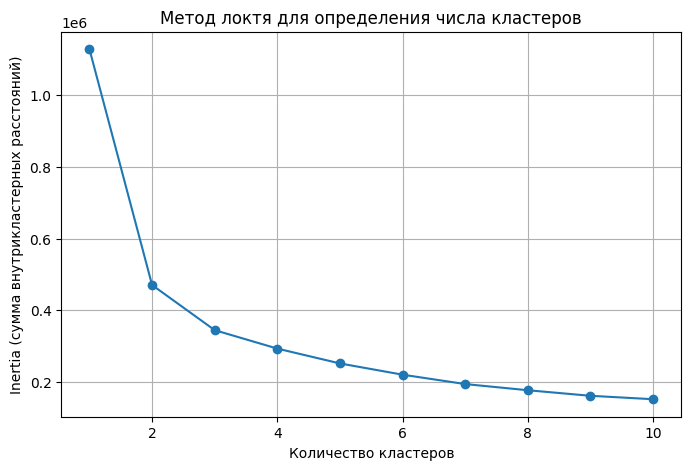

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia (сумма внутрикластерных расстояний)')
plt.title('Метод локтя для определения числа кластеров')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
df['Cluster'].value_counts()

,count
Cluster,
0,1365
2,1360
3,1275
4,1047
1,849
5,711


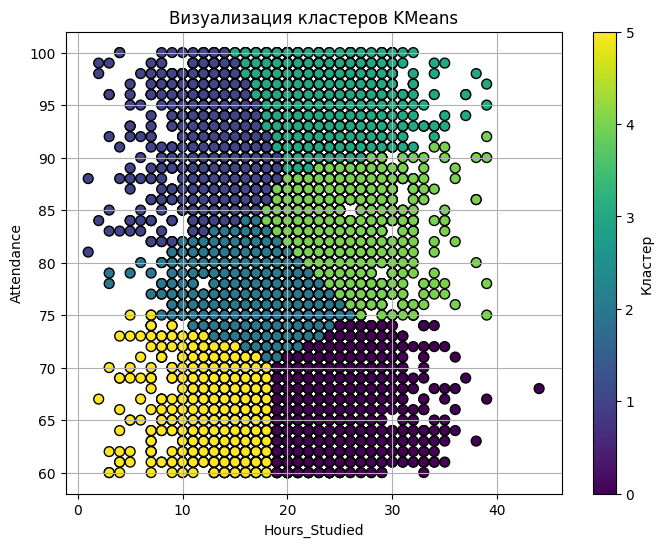

In [ ]:
import matplotlib.pyplot as plt

x_feature = 'Hours_Studied'
y_feature = 'Attendance'

plt.figure(figsize=(8, 6))
plt.scatter(
    df[x_feature],
    df[y_feature],
    c=df['Cluster'],
    cmap='viridis',
    s=50,
    edgecolor='k'
)

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('Визуализация кластеров KMeans')
plt.grid(True)
plt.colorbar(label='Кластер')
plt.show()

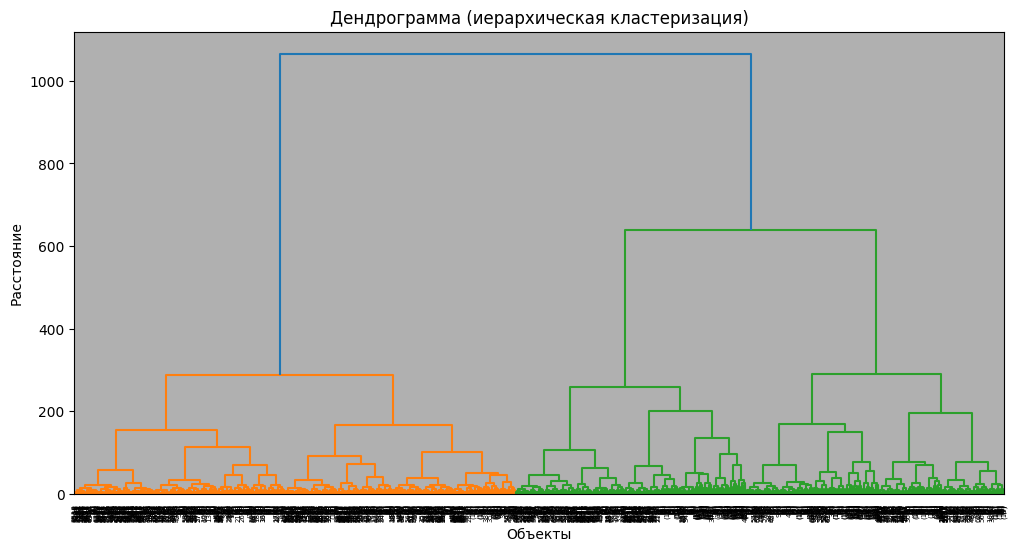

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=10)
plt.title('Дендрограмма (иерархическая кластеризация)')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.grid(True)
plt.show()

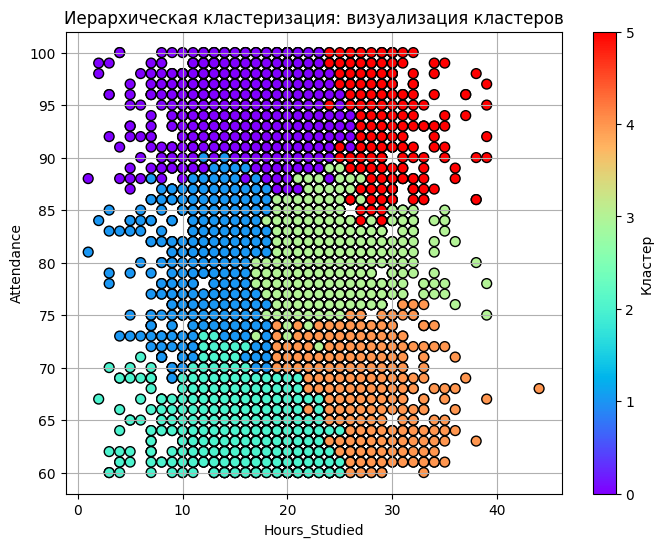

In [ ]:
model = AgglomerativeClustering(n_clusters=6, linkage='ward')
df['Cluster_HC'] = model.fit_predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(
    df['Hours_Studied'],
    df['Attendance'],
    c=df['Cluster_HC'],
    cmap='rainbow',
    s=50,
    edgecolor='k'
)
plt.xlabel('Hours_Studied')
plt.ylabel('Attendance')
plt.title('Иерархическая кластеризация: визуализация кластеров')
plt.grid(True)
plt.colorbar(label='Кластер')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Чем выше значение, тем лучше разделены кластеры.
# Насколько объект похож на свой кластер по сравнению с другими кластерами.
silhouette_kmeans = silhouette_score(X, df['Cluster'])
print(f"Силуэтный коэффициент для KMeans: {silhouette_kmeans:.3f}")

silhouette_hc = silhouette_score(X, df['Cluster_HC'])
print(f"Силуэтный коэффициент для иерархической кластеризации: {silhouette_hc:.3f}")


# Davis-Bouldin Index — это метрика, которая рассчитывает среднюю схожесть между кластерами,
# где схожесть определяется как отношение расстояния между центрами кластеров и средней компактностью кластеров.
# Чем меньше значение индекса, тем лучше разделены кластеры.

db_kmeans = davies_bouldin_score(X, df['Cluster'])
print(f"Davies-Bouldin Index для KMeans: {db_kmeans:.3f}")

db_hc = davies_bouldin_score(X, df['Cluster_HC'])
print(f"Davies-Bouldin Index для иерархической кластеризации: {db_hc:.3f}")

Силуэтный коэффициент для KMeans: 0.270
Силуэтный коэффициент для иерархической кластеризации: 0.251
Davies-Bouldin Index для KMeans: 1.142
Davies-Bouldin Index для иерархической кластеризации: 1.229


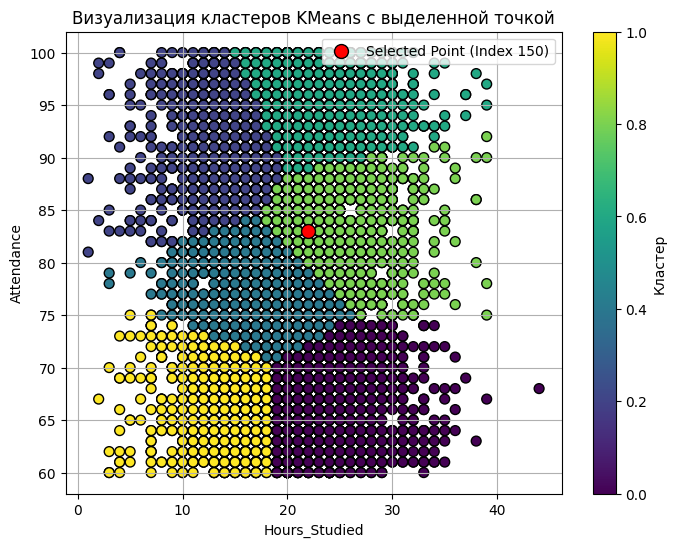

In [ ]:
selected_index = 150
selected_point = X.iloc[selected_index]

plt.figure(figsize=(8, 6))
plt.scatter(
    X[x_feature],
    X[y_feature],
    c=df['Cluster'],
    cmap='viridis',
    s=50,
    edgecolor='k'
)

plt.scatter(
    selected_point[x_feature],
    selected_point[y_feature],
    color='red',
    s=100,
    marker='o',
    edgecolor='black',
    label=f"Selected Point (Index {selected_index})"
)

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('Визуализация кластеров KMeans с выделенной точкой')
plt.grid(True)
plt.colorbar(label='Кластер')
plt.legend()
plt.show()